In [ ]:
!pip install -U pandas==0.19.2

     |████████████████████████████████| 18.9MB 43.1MB/s 
ERROR: xarray 0.15.1 has requirement pandas>=0.25, but you'll have pandas 0.19.2 which is incompatible.
ERROR: seaborn 0.11.1 has requirement pandas>=0.23, but you'll have pandas 0.19.2 which is incompatible.
ERROR: plotnine 0.6.0 has requirement pandas>=0.25.0, but you'll have pandas 0.19.2 which is incompatible.
ERROR: pandas-datareader 0.9.0 has requirement pandas>=0.23, but you'll have pandas 0.19.2 which is incompatible.
ERROR: mizani 0.6.0 has requirement pandas>=0.25.0, but you'll have pandas 0.19.2 which is incompatible.
ERROR: google-colab 1.0.0 has requirement pandas~=1.1.0; python_version >= "3.0", but you'll have pandas 0.19.2 which is incompatible.
ERROR: fbprophet 0.7.1 has requirement pandas>=1.0.4, but you'll have pandas 0.19.2 which is incompatible.
  Found existing installation: pandas 1.1.5
    Uninstalling pandas-1.1.5:
      Successfully uninstalled pandas-1.1.5


In [ ]:
!pip install nxviz

     |████████████████████████████████| 276kB 6.8MB/s 
     |████████████████████████████████| 13.1MB 351kB/s 
     |████████████████████████████████| 10.5MB 44.2MB/s 
     |████████████████████████████████| 266kB 46.0MB/s 
     |████████████████████████████████| 215kB 47.1MB/s 
     |████████████████████████████████| 20.4MB 1.5MB/s 
     |████████████████████████████████| 2.3MB 45.2MB/s 
     |████████████████████████████████| 225kB 46.3MB/s 
     |████████████████████████████████| 1.8MB 41.0MB/s 
     |████████████████████████████████| 583kB 40.3MB/s 
     |████████████████████████████████| 61kB 7.5MB/s 
     |████████████████████████████████| 81kB 8.4MB/s 
     |████████████████████████████████| 112kB 53.0MB/s 
  Created wheel for PyYAML: filename=PyYAML-5.1.2-cp36-cp36m-linux_x86_64.whl size=44105 sha256=0310d94440407f19d5b3e00e687bb6f8f500a12cae0b4d4ea039b87dccb40c52
  Stored in directory: /root/.cache/pip/wheels/d9/45/dd/65f0b38450c47cf7e5312883deb97d065e030c5cca0a365030
  Create

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from collections import defaultdict
import networkx as nx
import nxviz as nxv
import community
import requests 
import json 
import time 


In [ ]:
from google.colab import files
files.upload()

Saving got-s7-edges.csv to got-s7-edges.csv
Saving got-s7-nodes - got-s7-nodes.csv to got-s7-nodes - got-s7-nodes.csv


{'got-s7-edges.csv': b'Source,Target,Weight,Season\r\nDAENERYS,TYRION,179,7\r\nDAENERYS,JON,178,7\r\nCERSEI,JAIME,172,7\r\nARYA,SANSA,156,7\r\nJON,TYRION,107,7\r\nLITTLEFINGER,SANSA,107,7\r\nDAVOS,JON,92,7\r\nBRONN,JAIME,85,7\r\nJON,SANSA,79,7\r\nMARWYN,SAM,75,7\r\nCERSEI,TYRION,74,7\r\nDAENERYS,VARYS,65,7\r\nBERIC,HOUND,63,7\r\nJON,JORAH,59,7\r\nHOUND,THOROS,57,7\r\nHOUND,TORMUND,57,7\r\nDAVOS,GENDRY,55,7\r\nJON,TORMUND,50,7\r\nDAVOS,TYRION,46,7\r\nTYRION,VARYS,45,7\r\nBRAN,SANSA,44,7\r\nCERSEI,QYBURN,44,7\r\nBERIC,JON,41,7\r\nCERSEI,EURON,38,7\r\nCERSEI,TYCHO,37,7\r\nJAIME,OLENNA,37,7\r\nJON,MISSANDEI,36,7\r\nDAENERYS,MISSANDEI,35,7\r\nJON,THEON,35,7\r\nDAENERYS,JORAH,34,7\r\nJAIME,TYRION,34,7\r\nARYA,HOT_PIE,33,7\r\nCERSEI,DAENERYS,33,7\r\nCERSEI,MOUNTAIN,33,7\r\nDAENERYS,DAVOS,33,7\r\nJAIME,RANDYLL,33,7\r\nDAVOS,MISSANDEI,31,7\r\nGREY_WORM,MISSANDEI,31,7\r\nMISSANDEI,TYRION,31,7\r\nBERIC,THOROS,30,7\r\nGENDRY,JON,30,7\r\nBRIENNE,SANSA,29,7\r\nBERIC,TORMUND,27,7\r\nHOUND,JON,27,7\r\

In [ ]:
URL = "https://www.anapioficeandfire.com/api/characters?page=%d&pageSize=100"
DELAY = 1

chars = []
final_chars = []

for page in range(1, 50):
    r = requests.get(URL % page)
    new_chars = r.json()
    if len(new_chars) == 0:
        break
    chars.extend(new_chars)
    time.sleep(DELAY)

for char in chars:
    if len(char['name']) > 0:
        final_chars.append(char)

print("Finally %d characters fetched from the API" % len(final_chars))

Finally 2124 characters fetched from the API


In [ ]:
df = pd.DataFrame(final_chars) 
df.head(5)

,url,name,gender,culture,born,died,titles,aliases,father,mother,spouse,allegiances,books,povBooks,tvSeries,playedBy
0,https://www.anapioficeandfire.com/api/characte...,Walder,Male,,,,[],[Hodor],,,,[https://www.anapioficeandfire.com/api/houses/...,[https://www.anapioficeandfire.com/api/books/1...,[],"[Season 1, Season 2, Season 3, Season 4, Seaso...",[Kristian Nairn]
1,https://www.anapioficeandfire.com/api/characte...,Balon Greyjoy,Male,,,"299 AC, at Pyke","[Iron King, King of the Isles and the North, K...","[Balon the Brave, Balon the Blessed, Balon the...",https://www.anapioficeandfire.com/api/characte...,,https://www.anapioficeandfire.com/api/characte...,[],[https://www.anapioficeandfire.com/api/books/1...,[],"[Season 2, Season 3, Season 6]",[Patrick Malahide]
2,https://www.anapioficeandfire.com/api/characte...,Chayle,Male,,,"In 299 AC, at Winterfell",[Septon],[],,,,[],[https://www.anapioficeandfire.com/api/books/1...,[],[],[]
3,https://www.anapioficeandfire.com/api/characte...,Gillam,Male,,,,[Brother],[],,,,[],[https://www.anapioficeandfire.com/api/books/5],[],[],[]
4,https://www.anapioficeandfire.com/api/characte...,High Septon,Male,,,,"[High Septon, His High Holiness, Father of the...",[The High Sparrow],,,,[],[https://www.anapioficeandfire.com/api/books/5...,[],"[Season 5, Season 6]",[Jonathan Pryce]


In [ ]:
nodes = df[['name','gender','culture']]

In [ ]:
nodes

In [ ]:
def create_graph(nodes_df, edges_df):
    g = nx.Graph()
    for i,row in edges.iterrows():
        keys = row.index.tolist()
        values = row.values
        g.add_edge(row['Source'], row['Target'],**dict(zip(keys,values)))
    for i,row in nodes.iterrows():
        keys = row.index.tolist()
        values = row.values
        g.add_node(row["Id"],**dict(zip(keys,values)))
    return g
    
g = create_graph(nodes, edges)

/usr/local/lib/python3.6/dist-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


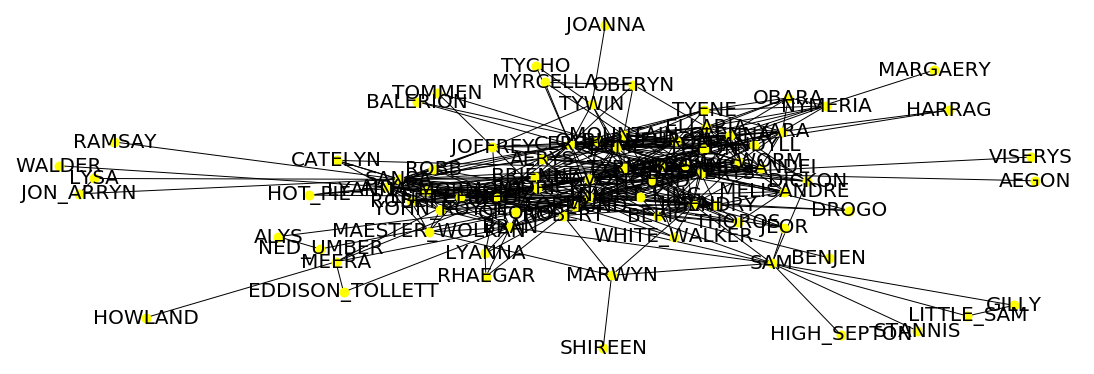

In [ ]:
plt.figure(figsize=(15,5)) 
nx.draw(g,node_size=80,font_size=20,with_labels=True,node_color="yellow") 
plt.show()

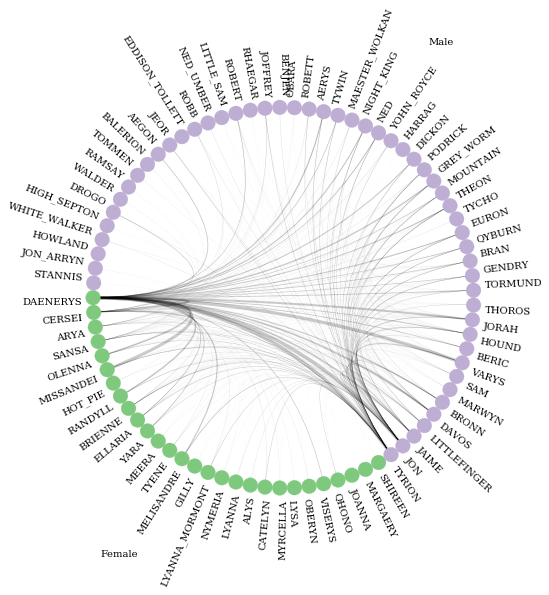

In [ ]:
Plot1 = nxv.CircosPlot(g, node_color='Gender', node_grouping='Gender',
                   edge_width=(edges['Weight'] / edges['Weight'].quantile(0.96)).tolist(),
                   node_labels=True, node_label_layout='rotation',
                   group_label_position="middle", 
                   group_label_offset=12,
                   figsize=(8,8))
Plot1.draw()

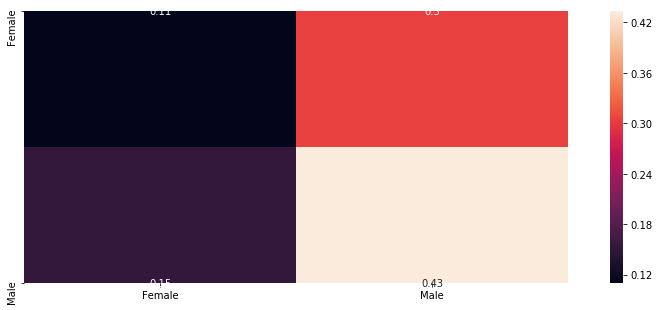

In [ ]:
counter = defaultdict(int)
for frm, to in g.edges:
    link_type = g.nodes[frm]['Gender'],g.nodes[to]['Gender']
    counter[link_type] += g.edges[(frm,to)]['Weight']

Plot2 = nx.DiGraph()
for (frm,to),w in counter.items():
    Plot2.add_edge(frm, to, weight=w)

Plot2.edges[('male','female')]
plt.figure(figsize=(15,5))
m = nx.to_numpy_matrix(Plot2, nodelist=Plot2.nodes)
sns.heatmap(m/m.sum(), annot=True, 
            xticklabels=list(Plot2.nodes), yticklabels=list(Plot2.nodes));
plt.gca().set_aspect('equal')

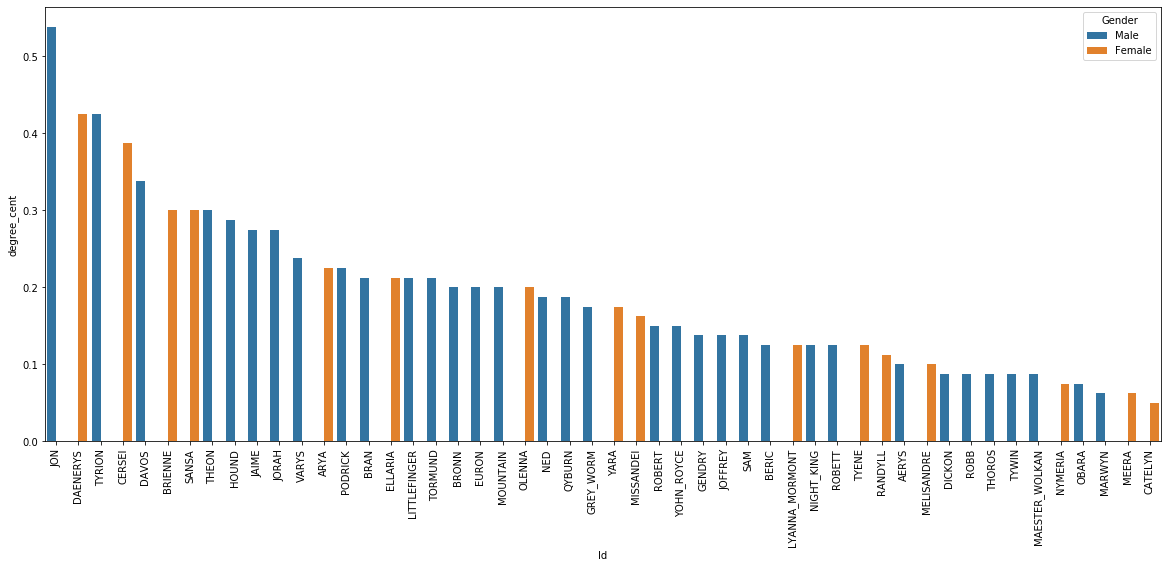

In [ ]:
degree_cent = nx.degree_centrality(g)
nodes['degree_cent'] = nodes['Id'].apply(lambda x: degree_cent[x])
g = create_graph(nodes, edges)

fig, ax = plt.subplots(figsize=(20,8))
sns.barplot(data=nodes.nlargest(50, 'degree_cent'), 
            x='Id', y='degree_cent', hue='Gender', 
            ax=ax);
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);

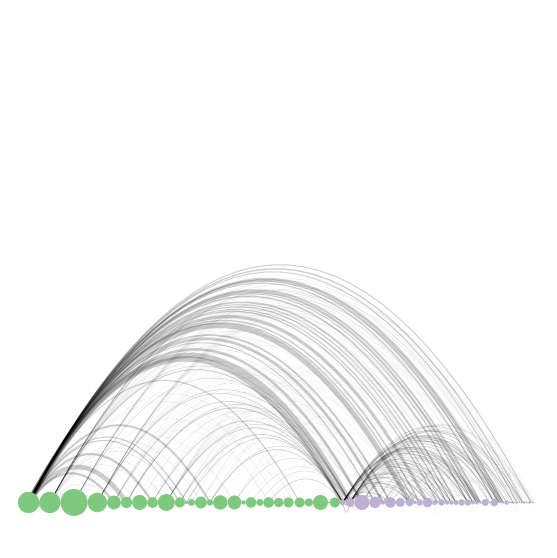

In [ ]:
a = nxv.ArcPlot(g, node_color='Gender', node_grouping='Gender', 
                node_size=[10*g.nodes[n]['degree_cent'] for n in g.nodes], 
                edge_width=(edges['Weight'] / edges['Weight'].quantile(.92)).tolist(),
                figsize=(10,10))
a.draw()

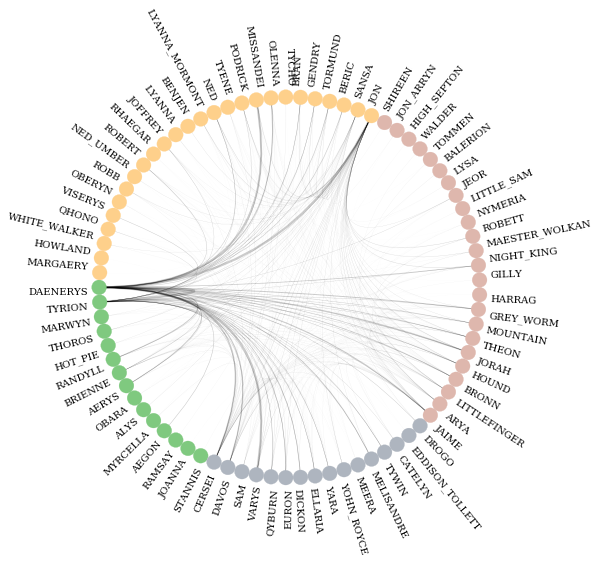

In [ ]:
com = community.best_partition(g, weight='Weight')
nodes['com'] = [v for c,v in com.items()]
g = create_graph(nodes, edges)

c = nxv.CircosPlot(g, node_color='com', node_grouping='com',
                   node_labels=True, node_label_layout='rotation',
                   edge_width=(edges['Weight'] / edges['Weight'].quantile(0.98)).tolist(),
                   figsize=(8,8))
c.draw()

/usr/local/lib/python3.6/dist-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


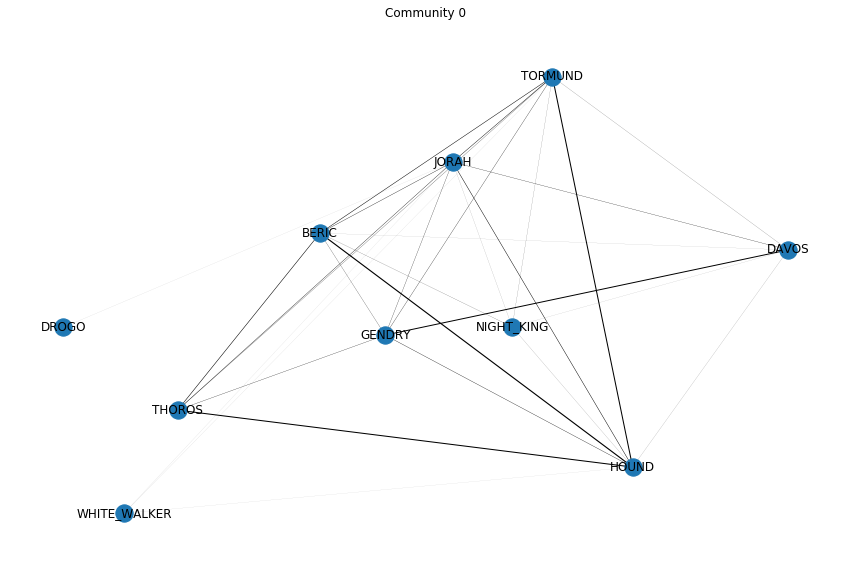

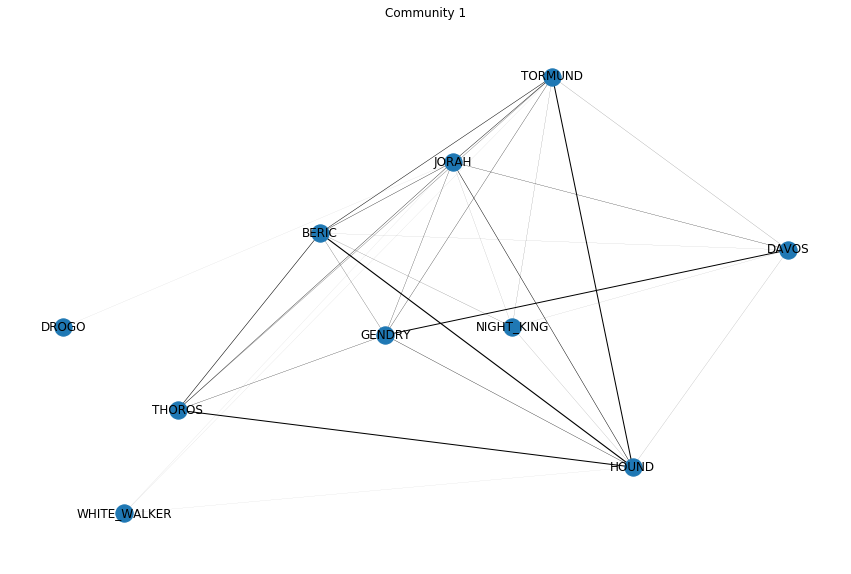

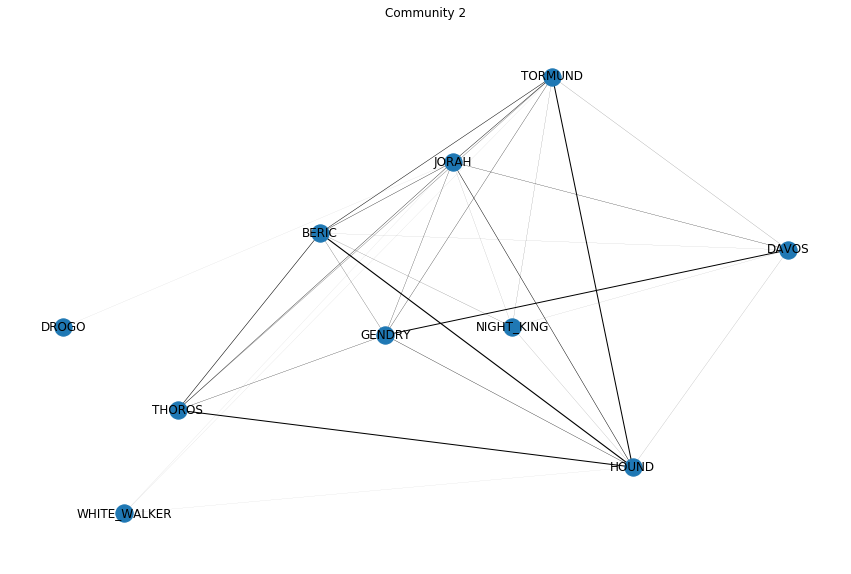

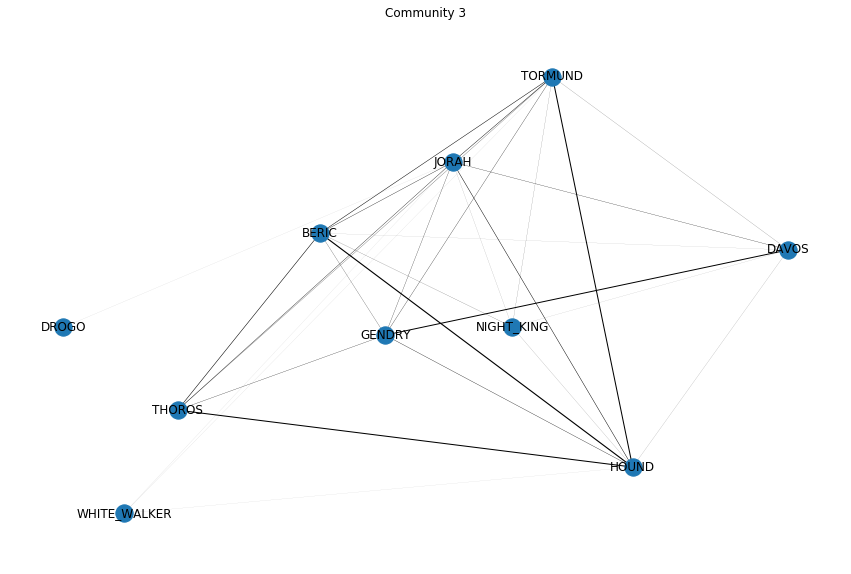

In [ ]:
pos = nx.spring_layout(g)
for com_num in np.unique([v for c,v in com.items()]):
    partition = community.best_partition(g)

    node_list = []
   
    for node, c in partition.items():
        if c == com_num:
            nodelist.append(node)
        else:
            partition[node] = -1
    
    sub_g = g.subgraph(node_list)
    edge_w = [sub_g.edges[e]['Weight'] for e in sub_g.edges]
    edge_w = [w/np.quantile(edge_widths, 0.9) for w in edge_widths]
    
    fig, ax = plt.subplots(figsize=(15,10))
    nx.draw(sg, pos, with_labels=True, width=edge_w)
    ax.set_title(f'Community {com_num}');

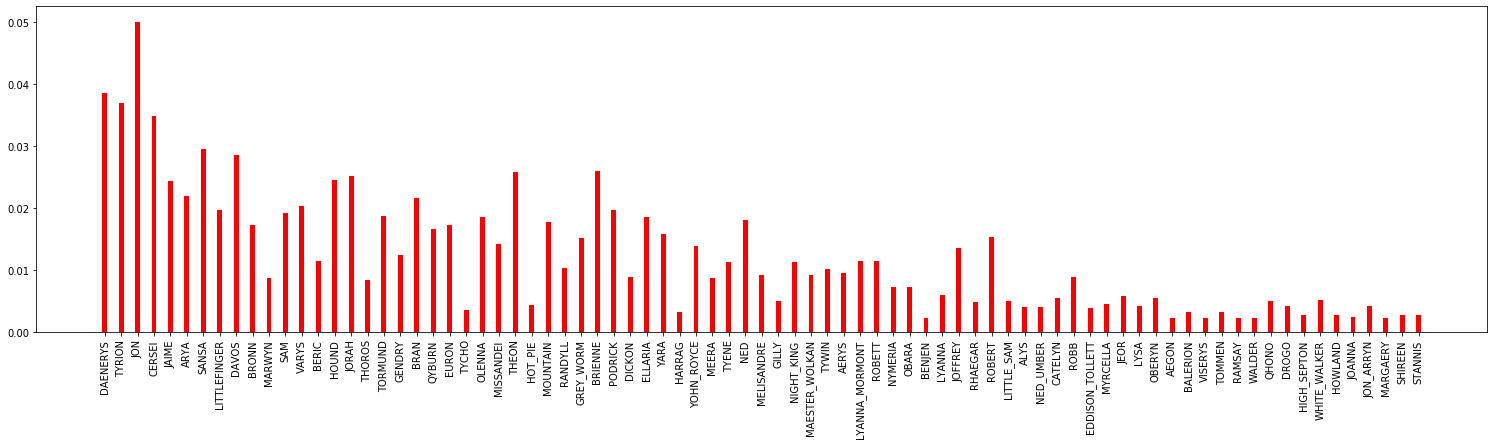

In [ ]:
pr = nx.pagerank(g, alpha=0.9)
plt.figure(figsize=(26, 6))
plt.bar(range(len(pr)), list(pr.values()), align='center',color='red',width=0.3)
plt.xticks(range(len(pr)), list(pr.keys()))
plt.xticks(rotation=90)
plt.show()